# Loading, testing, and exploring the 'Hate' dataset

 #### Installing, importing, and defining required packages

In [2]:
!pip install transformers
!pip install torch
!pip install pandas
!pip install numpy
!pip install tabulate
!pip install emoji
import csv
import matplotlib.pyplot as mpl
import requests
import urllib
import pandas as pd
import numpy as np
from pathlib import Path
from urllib.request import urlopen
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gdark\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Import Hate dataset

In [4]:
MAPPING_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/hate/mapping.txt"
mapping = urlopen(MAPPING_URL).read().decode('utf-8').split("\n")


TEST_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/hate/test_labels.txt"
test_labels = urlopen(TEST_LABELS_URL).read().decode('utf-8').split("\n")


TEST_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/hate/test_text.txt"
test_text = urlopen(TEST_TEXT_URL).read().decode('utf-8').split("\n")


TRAIN_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/hate/train_labels.txt"
train_labels = urlopen(TRAIN_LABELS_URL).read().decode('utf-8').split("\n")


TRAIN_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/hate/train_text.txt"
train_text = urlopen(TRAIN_TEXT_URL).read().decode('utf-8').split("\n")


VAL_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/hate/val_labels.txt"
val_labels = urlopen(VAL_LABELS_URL).read().decode('utf-8').split("\n")


VAL_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/hate/val_text.txt"
val_text = urlopen(VAL_TEXT_URL).read().decode('utf-8').split("\n")




 #### Basic info about imported data structures (all values should be in thousands, apart from mapping.txt)

In [5]:
print("Mapping information:")
print("mapping.txt length: " + str(len(mapping)) + "\n")

print("Test data information:")
print("test_labels.txt length: " + str(len(test_labels)))
print("test_text.txt length: " + str(len(test_text)) + "\n")

print("Training data information:")
print("train_labels.txt length: " + str(len(train_labels)))
print("train_text.txt length: " + str(len(train_text)) + "\n")
      
print("Value data information:")
print("val_labels.txt length: " + str(len(val_labels)))
print("val_text.txt length: " + str(len(val_text)))


Mapping information:
mapping.txt length: 2

Test data information:
test_labels.txt length: 2971
test_text.txt length: 2971

Training data information:
train_labels.txt length: 9001
train_text.txt length: 9001

Value data information:
val_labels.txt length: 1001
val_text.txt length: 1001


In [6]:
def visualiser(tweetVar, labelVar):
    tweet_array = []
    label_array = []
    for i in range(len(tweetVar)):
        tweet_array.append({"Tweet" : tweetVar[i], "Label" : labelVar[i]})
        label_array.append(i)
    dataframe = pd.DataFrame(tweet_array, index=label_array)
    dataframe = dataframe[:-1] # Drop last row, as is a blank
    return dataframe

testDataFrame = visualiser(test_text, test_labels)
trainDataFrame = visualiser(train_text, train_labels)
valDataFrame = visualiser(val_text, val_labels)

print("\n test_data and test_label: ")
display(testDataFrame)
print("\n---------------------------------------------------------------------------\n")
print("\n train_data and train_label: ")
display(trainDataFrame)
print("\n---------------------------------------------------------------------------\n")
print("\n val_data and val_label: ")
display(valDataFrame)

print("\n---------------------------------------------------------------------------\n")
print("\n mapping output: ")
for line in mapping:
    print(line)


 test_data and test_label: 


,Tweet,Label
0,"@user , you are correct that Reid certainly is...",0
1,Whoever just unfollowed me you a bitch,1
2,@user @user Those People Invaded Us!!! They DO...,1
3,"stop JUDGING bitches by there cover, jus cuz s...",1
4,how about i knock heads off and send them gift...,1
...,...,...
2965,@user Calling them #IllegalAliens is heartless...,0
2966,Silly Killary WANNABE !! And @user numbers JUS...,0
2967,@user @user @user @user @user @user @user @use...,0
2968,@user StopImmigration,1



---------------------------------------------------------------------------


 train_data and train_label: 


,Tweet,Label
0,@user nice new signage. Are you not concerned ...,0
1,A woman who you fucked multiple times saying y...,1
2,@user @user real talk do you have eyes or were...,1
3,your girlfriend lookin at me like a groupie in...,1
4,Hysterical woman like @user,0
...,...,...
8995,Oooohhhh bitch didn't even listen to the dead ...,0
8996,@user Good Luck @user More Americans #WalkAway...,0
8997,Bitch you can't keep up so stop trying,1
8998,@user @user @user @user @user @user Japan is a...,0



---------------------------------------------------------------------------


 val_data and val_label: 


,Tweet,Label
0,"@user @user If book Claire wanted to ""stay in ...",0
1,After arriving in the EU refugees make protest...,0
2,😳👇,0
3,@user Worst thing is if they are that stupid t...,1
4,@user Say's the HYSTERICAL woman. It is woman ...,0
...,...,...
995,Pass #MeritBased Immigration. Kill #ChainMigra...,1
996,imagine chaeyoung cutting some cooked meat for...,0
997,I usually dont hate people but I actually hate...,1
998,Cameron stopped immigrants voting on the EU in...,1



---------------------------------------------------------------------------


 mapping output: 
0	not-hate
1	hate


#### Printing basic stats

In [7]:
print("The longest tweet in testData is " + str(testDataFrame.Tweet.str.len().max()) + " bytes long.")
print("The longest tweet in trainData is " + str(trainDataFrame.Tweet.str.len().max()) + " bytes long.")
print("The longest tweet in valData is " + str(valDataFrame.Tweet.str.len().max()) + " bytes long.")
print("\n---------------------------------------------------------------------------\n")

print("The shortest tweet in testData is " + str(testDataFrame.Tweet.str.len().min()) + " bytes long.")
print("The shortest tweet in trainData is " + str(trainDataFrame.Tweet.str.len().min()) + " bytes long.")
print("The shortest tweet in valData is " + str(valDataFrame.Tweet.str.len().min()) + " bytes long.")
print("\n")


The longest tweet in testData is 504 bytes long.
The longest tweet in trainData is 304 bytes long.
The longest tweet in valData is 530 bytes long.

---------------------------------------------------------------------------

The shortest tweet in testData is 16 bytes long.
The shortest tweet in trainData is 0 bytes long.
The shortest tweet in valData is 0 bytes long.




 ### Presenting data label split (hate vs non-hate tweets)

In [8]:
categoryNames = ["not-hate", "hate"]


def mappingVariation(dataFrame):
    CountArray = []
    hateOrNot = dataFrame.Label.value_counts().sort_index()
    
    i = 0
    for val in hateOrNot:
        CountArray.append(val)
        i += 1
    return hateOrNot



<function matplotlib.pyplot.show(close=None, block=None)>

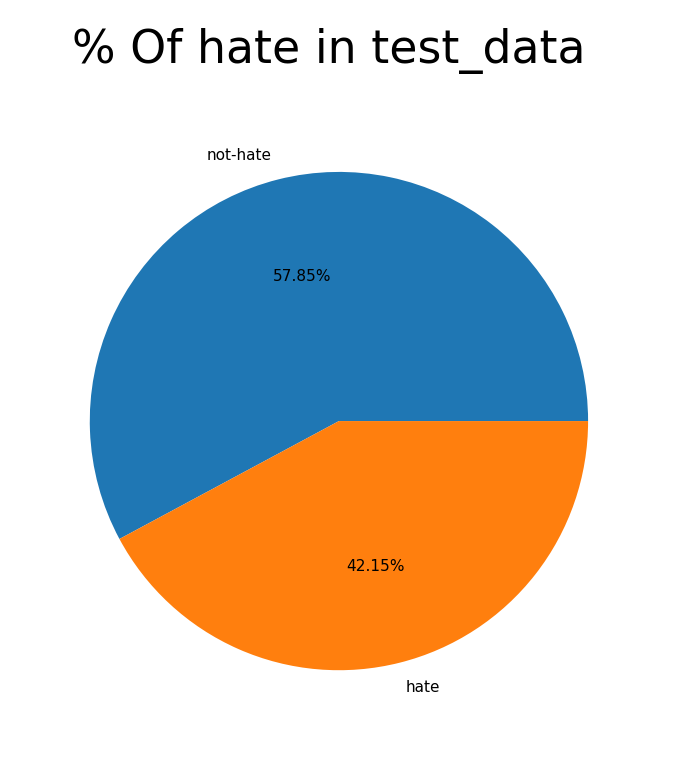

In [9]:
testDataFrameCount = mappingVariation(testDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(testDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('% Of hate in test_data')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

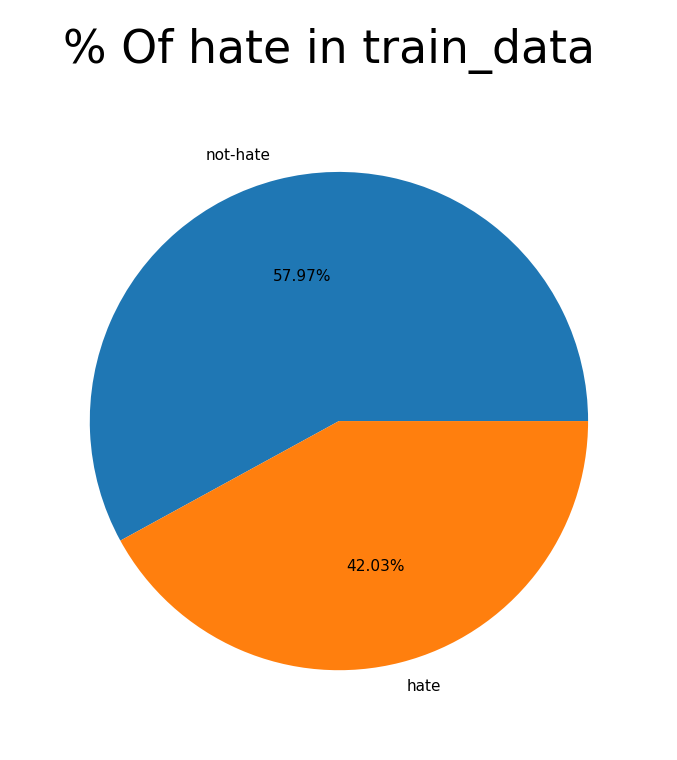

In [10]:
trainDataFrameCount = mappingVariation(trainDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(trainDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('% Of hate in train_data')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

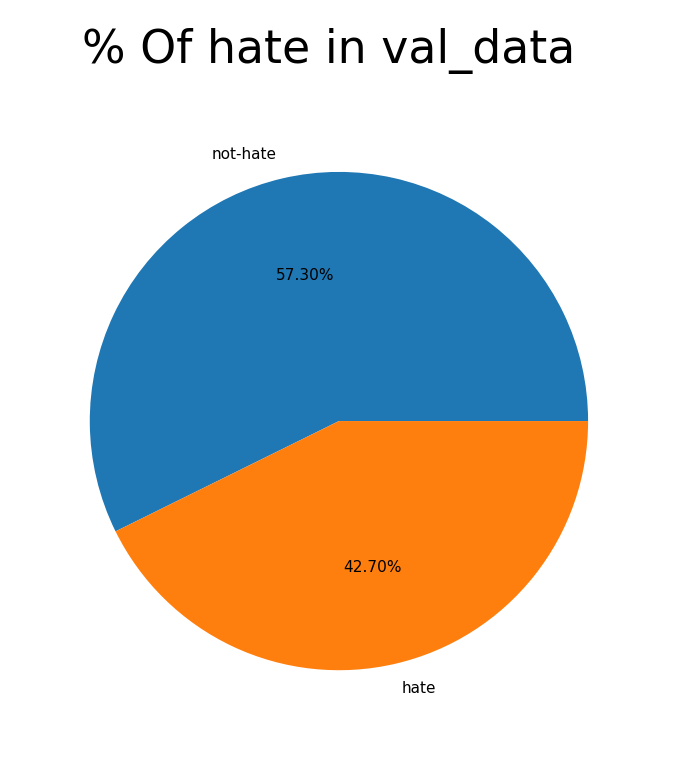

In [11]:
valDataFrameCount = mappingVariation(valDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(valDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('% Of hate in val_data')
mpl.show

# Natural Language Toolkit

 ### Testing out NLTK stopword removal

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

for x in range(30):
    noStopWords = ""
    wordBag = word_tokenize(test_text[x])
    noStopWords = [word for word in wordBag if not word in stopwords.words()]
    print(noStopWords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gdark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['@', 'user', ',', 'correct', 'Reid', 'certainly', 'weasel', '.', 'Sadly', ',', "'ve", 'got', 'weasels', ';', '@', 'user', 'Sen', 'McConnell', '&', '@', 'user', '.The', 'corrupt', 'Mueller', 'investigation', 'w/be', 'STOPPED', '3', 'jobs.', '#', 'MAGA', '#', 'KAG', '#', 'POTUS', '#', 'Trump', '#', 'NEWS', '#', 'VoteRed', '#', 'NoDACA', '#', 'USA']
['Whoever', 'unfollowed', 'bitch']
['@', 'user', '@', 'user', 'Those', 'People', 'Invaded', 'Us', '!', '!', '!', 'They', 'DO', 'NOT', 'BELING', 'HERE', '&', 'HAVE', 'NO', 'RIGHTS', '!', 'Its', '#', 'AmericaFIRST', '!', 'Open', 'Your', 'House', 'To', 'Them', 'If', 'Your', 'That', 'IGNORANT', '!', '&', 'Yes', 'Im', 'A', '#', 'Christian', 'Too', '!', '#', 'NODACA', '!']
['stop', 'JUDGING', 'bitches', 'cover', ',', 'jus', 'cuz', 'bad', "n't", 'mean', "'s", 'catch', 'shawdy', 'could', 'whore', '👀', 'opposite', 'keeper']
['knock', 'heads', 'send', 'gift', 'wrapped', 'moms', 'house', 'dumb', 'raggedy', 'bird', 'bitch', 'ass', 'hoes']
['@', 'user', '

 ### Testing out NLTK stemming

In [13]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 


stemmer = PorterStemmer()


for x in range(30):
    stemmed = ""
    wordBag = word_tokenize(test_text[x])
    for y in range(len(wordBag)):
        stemmed += " " + stemmer.stem(wordBag[y])
    print(stemmed)

 @ user , you are correct that reid certainli is a weasel . sadli , we 've got our own weasel ; @ user sen mcconnel & @ user .the corrupt mueller investig w/be stop if those 3 did their jobs. # maga # kag # potu # trump # new # voter # nodaca # usa
 whoever just unfollow me you a bitch
 @ user @ user those peopl invad Us ! ! ! they DO not bele here & have NO right ! it # americafirst ! open your hous To them If your that ignor ! & ye Im A # christian too ! # nodaca !
 stop judg bitch by there cover , ju cuz she bad do n't mean she 's a catch shawdi could be a whore 👀 da opposit of a keeper
 how about i knock head off and send them gift wrap to your mom hous you dumb raggedi bird bitch ass hoe
 @ user @ user @ user alway # nodaca.i AM born IN # usa and # usa first .
 @ user friend ? that 's my blood brother bitch .. he in yo citi ! ! i 'm hour away . ill be through there tomo…
 @ user @ user muslim attack US on 9/11 , 3000 kill . subsequ we allow more muslim in our countri ? ! ? doe thi